In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn


## loading Data

In [2]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [4]:
train_data = datasets.MNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform = None)
test_data = datasets.MNIST(root="data",train=False,download=True,transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17251203.62it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 484169.00it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4397729.50it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7653888.62it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
image,label = train_data[0]
# image,label
image.shape

torch.Size([1, 28, 28])

In [9]:
# Checking for sample size of test and train data
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [10]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Visualizing the Data

Image Shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

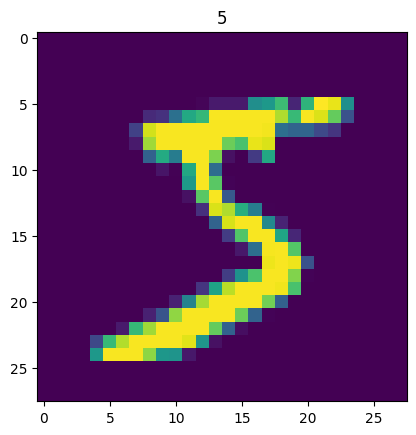

In [13]:
image,label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

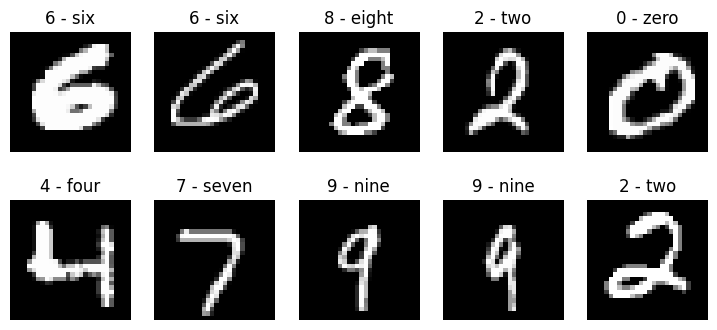

In [17]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,4))
rw,cl = 2,5
for i in range(1,rw*cl+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rw,cl,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepping Dataloader

In [20]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

print(f"Dataloaders : {train_dataloader,test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} and Length of test dataloader : {len(test_dataloader)}")
print(f"Number of batches in train dataloader : {BATCH_SIZE} and Number of batches in test dataloader : {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x796d782834f0>, <torch.utils.data.dataloader.DataLoader object at 0x796d78280b80>)
Length of train dataloader : 1875 and Length of test dataloader : 313
Number of batches in train dataloader : 32 and Number of batches in test dataloader : 32


## Building a CONVOLUTIONAL NUERAL NETWROK (CNN)

In [21]:
class MNISTModel(nn.Module):
  def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    self.block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2))

    self.block_2 = nn.Sequential(nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2))

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))

  def forward(self,x:torch.Tensor):
    x = self.block_1(X)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)

model_0 = MNISTModel(input_shape=1,output_shape=len(class_names),hidden_units=10)
model_0



MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [22]:
# Setting up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [24]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer):
  train_loss,train_acc = 0,0
  for batch, (X,y) in enumerate(data_loader):
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss : {train_loss:.5f} and Train accuracy : {train_acc:.2f}%")



In [25]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      test_pred = model(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss:.5f} and Test accuracy : {test_acc:.2f}%")

In [ ]:
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      test_pred = model(X)
      loss += loss_fn(test_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}